In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [395]:
df1 = pd.read_excel("E:/APS/final_classification_data2.xlsx")

In [396]:
df1.shape

(9224, 2)

In [397]:
#df1 = df1.drop_duplicates()

In [398]:
#df1.shape

In [399]:
#df1.to_excel('data222.xlsx')

In [400]:
df2 = pd.read_excel(r"E:\APS\linkedin_aws.xlsx")

In [401]:
df2 = pd.read_excel(r"E:\APS\linkedin_aws.xlsx")

In [402]:
df3 = pd.read_excel(r"E:\APS\linkedin_datascience.xlsx")

In [403]:
df4 = pd.read_excel(r"E:\APS\linkedin_devops.xlsx")

In [404]:
df5 = pd.read_excel(r"E:\APS\linkedin_degital_marketing.xlsx")

In [405]:
df7 = pd.read_excel(r"E:\APS\linkedin_business_analyst.xlsx")

In [406]:
df8 = pd.read_excel(r"E:\APS\linkedin_product_manager.xlsx")

In [407]:
df9 = pd.read_excel(r"E:\APS\linkedin_testing.xlsx")

In [408]:
df10 = pd.read_excel(r"E:\APS\linkedin_hr2.xlsx")

In [410]:
df111 = pd.read_excel(r"E:\APS\linkedin_kaggle.xlsx")

In [375]:
df11 = pd.read_excel(r"E:\APS\dataset\data222.xlsx")
df21 = pd.read_excel(r"E:\APS\dataset\linkedin_aws.xlsx")

df31 = pd.read_excel(r"E:\APS\dataset\linkedin_datascience.xlsx")

df41 = pd.read_excel(r"E:\APS\dataset\linkedin_devops.xlsx")

df51 = pd.read_excel(r"E:\APS\dataset\linkedin_degital_marketing.xlsx")

df71 = pd.read_excel(r"E:\APS\dataset\linkedin_business_analyst.xlsx")

df81 = pd.read_excel(r"E:\APS\dataset\linkedin_product_manager.xlsx")

df91 = pd.read_excel(r"E:\APS\dataset\linkedin_testing.xlsx")

In [376]:
frames = [df11, df21, df31, df41, df51, df71, df81, df91]
df = pd.concat(frames)

In [411]:
frames = [df1, df2, df3, df4, df5, df7, df8, df9, df10, df111]
  

In [412]:
df = pd.concat(frames)


In [413]:
df.shape

(19241, 2)

In [414]:
df.head(2)

,class,text
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po..."
1,projects,"[""PROJECTS Home / Small and Large Enterprise P..."


In [415]:
df.columns = ['label', 'text']

In [416]:
df.head(2)

,label,text
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po..."
1,projects,"[""PROJECTS Home / Small and Large Enterprise P..."


In [417]:
df.columns

Index(['label', 'text'], dtype='object')

In [418]:
df.shape

(19241, 2)

In [419]:
#df.class.unique().values

In [420]:
df.isna().sum()

label     0
text     23
dtype: int64

In [421]:
df = df.dropna()

In [422]:
df.isna().sum()

label    0
text     0
dtype: int64

In [423]:
df100 = df.drop_duplicates()

In [424]:
df100.shape

(12784, 2)

In [425]:
df100.to_excel('finaldata555.xlsx')

In [426]:
df100.head(100)

,label,text
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po..."
1,projects,"[""PROJECTS Home / Small and Large Enterprise P..."
2,projects,['Smart Dock (Computer and Hardware) Role: Lea...
3,projects,"['EXPERIENCE\n', '\n', 'Baker Hughes, Staff UX..."
4,projects,['Project: Insightl Role: Lead UX Designer Wit...
...,...,...
95,skills,"['SOFT SKILLS\n', '\n', 'Planner\n', '\n', 'Pr..."
96,skills,"['TECHNICAL SKILLS\n', '\n', 'Graphic Designi..."
97,user_info,"['V. SRAVAN KUMAR\n', '\n', 'Senior UI UX Desi..."
98,personal_details,"['PERSONAL DETAILS\n', '\n', 'Date of Birth: 2..."


In [2]:
df100 = pd.read_excel(r"E:\RAJU\finaldata555.xlsx")

In [3]:
a = df100['label'].unique()
print(sorted(a))

['certifications', 'declaration', 'education', 'personal_details', 'projects', 'skills', 'summary', 'user_info']


In [345]:
#df.get('label')

0      certifications
1      certifications
2      certifications
3      certifications
4      certifications
            ...      
944         user_info
945         user_info
946         user_info
947         user_info
948         user_info
Name: label, Length: 8952, dtype: object

In [429]:
# a = df['label'].unique()
# print(sorted(a))

['certifications', 'declaration', 'education', 'personal_details', 'projects', 'skills', 'summary', 'user_info']


In [430]:
#df['label'].value_counts()

projects            8103
user_info           3115
skills              2807
summary             2219
education           1689
certifications       672
personal_details     474
declaration          139
Name: label, dtype: int64

In [5]:
df100['label'].value_counts()

projects            4564
user_info           2473
skills              2095
summary             1722
education           1127
certifications       477
personal_details     261
declaration           65
Name: label, dtype: int64

In [6]:
df100.head(2)

,label,text
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po..."
1,projects,"[""PROJECTS Home / Small and Large Enterprise P..."


In [7]:
# Create a new column 'text_id' with encoded categories 
df100['text_id'] = df100['label'].factorize()[0]
text_id_df = df100[['label', 'text_id']]

In [8]:
df100.head()

,label,text,text_id
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po...",0
1,projects,"[""PROJECTS Home / Small and Large Enterprise P...",1
2,projects,['Smart Dock (Computer and Hardware) Role: Lea...,1
3,projects,"['EXPERIENCE\n', '\n', 'Baker Hughes, Staff UX...",1
4,projects,['Project: Insightl Role: Lead UX Designer Wit...,1


In [9]:
# Dictionaries for future use
text_to_id = dict(text_id_df.values)
id_to_text = dict(text_id_df[['text_id', 'label']].values)
# New dataframe
df100.head()

,label,text,text_id
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po...",0
1,projects,"[""PROJECTS Home / Small and Large Enterprise P...",1
2,projects,['Smart Dock (Computer and Hardware) Role: Lea...,1
3,projects,"['EXPERIENCE\n', '\n', 'Baker Hughes, Staff UX...",1
4,projects,['Project: Insightl Role: Lead UX Designer Wit...,1


In [10]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df100.text).toarray()
labels = df100['label']
print("Each of the %d data is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 12784 data is represented by 18685 features (TF-IDF score of unigrams and bigrams)


In [437]:
# Finding the three most correlated terms with each of the product categories
# N = 3
# for label, text_id in sorted(text_to_id.items()):
#   features_chi2 = chi2(features, labels == text_id)
#   indices = np.argsort(features_chi2[0])
#   feature_names = np.array(tfidf.get_feature_names())[indices]
#   unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#   bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#   print("n==> %s:" %(label))
#   print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
#   print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))

In [12]:
df100.head()

,label,text,text_id
0,user_info,"['KARRI.KUMAR,Lead User Experience Designer Po...",0
1,projects,"[""PROJECTS Home / Small and Large Enterprise P...",1
2,projects,['Smart Dock (Computer and Hardware) Role: Lea...,1
3,projects,"['EXPERIENCE\n', '\n', 'Baker Hughes, Staff UX...",1
4,projects,['Project: Insightl Role: Lead UX Designer Wit...,1


In [13]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
labels

0        user_info
1         projects
2         projects
3         projects
4         projects
           ...    
12779    user_info
12780    user_info
12781    user_info
12782    user_info
12783    user_info
Name: label, Length: 12784, dtype: object

In [15]:
X = df100['text'] # Collection of documents
y = df100['label'] # Target or the labels we want to predict 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [16]:
X_train.head()

6381                             mushroom classification\n
11757    Wahab ShaikhStudent at K. J. Somaiya Institute...
3828       ['UI / UX Designer (Extended Reality)\n', '\n']
683      ['Technical Skills\n', '\n', 'Web Development\...
3657     ['ICUBIXX Solutions Role: UI/UX Designer\n', '...
Name: text, dtype: object

In [17]:
X_train.shape

(9588,)

In [18]:
X_test.shape

(3196,)

In [19]:
y_train.shape

(9588,)

In [20]:
y_test.shape

(3196,)

In [21]:
y_train.head()

6381      projects
11757    user_info
3828     user_info
683         skills
3657        skills
Name: label, dtype: object

In [22]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [23]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [24]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\raju.gulla\Anaconda3\envs\onpassive\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\raju.gulla\Anaconda3\envs\onpassive\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [25]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.716057,0.117526
LogisticRegression,0.718323,0.112709
MultinomialNB,0.660987,0.079668
RandomForestClassifier,0.426702,0.072228


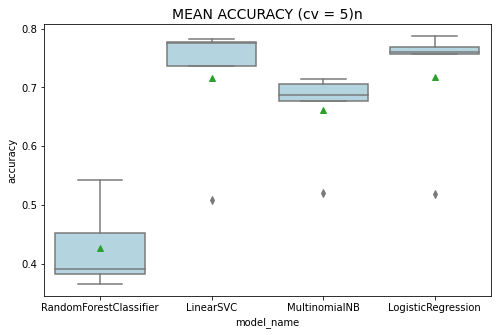

In [451]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)n", size=14);

In [26]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df100.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
df100.index

RangeIndex(start=0, stop=12784, step=1)

In [28]:
# Classification report
print('ttttCLASSIFICATIION METRICSn')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df100['label'].unique()))

ttttCLASSIFICATIION METRICSn
                  precision    recall  f1-score   support

       user_info       0.92      0.93      0.92       117
        projects       0.73      0.62      0.67        13
       education       0.91      0.87      0.89       297
          skills       0.61      0.52      0.56        63
         summary       0.82      0.84      0.83      1129
personal_details       0.84      0.83      0.83       534
  certifications       0.73      0.64      0.69       442
     declaration       0.78      0.86      0.81       601

        accuracy                           0.81      3196
       macro avg       0.79      0.76      0.78      3196
    weighted avg       0.81      0.81      0.81      3196



In [29]:
#Prediction


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [ ]:
# tvec=TfidfVectorizer(ngram_range=(1,2),stop_words='english').fit(x_train)

# df_train=pd.DataFrame(tvec.transform(x_train).todense(),columns=tvec.get_feature_names())
# df_test=pd.DataFrame(tvec.transform(x_test).todense(),columns=tvec.get_feature_names())

In [ ]:
# model=LogisticRegression()
# model.fit(df_train,y_train)

# model.score(df_test,y_test)

# model.score(df_train,y_train)

# from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report

# predictions=model.predict(df_test)
# print(accuracy_score(predictions,y_test))
# print(confusion_matrix(predictions,y_test))
# print(classification_report(predictions,y_test))

In [30]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [31]:
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [32]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

In [459]:
text1 = '''['Technical Expertise\n', '\n', 'Programming Languages\n', '\n', 'C, Java and SQL\n', '\n', 'Frameworks\n', '\n', 'Spring, Spring Boot, Spring Security, Hibernate\n', '\n', 'IDEs\n', '\n', 'Eclipse, NetBeans\n', '\n', 'Servers\n', '\n', 'Apache Tomcat\n', '\n', 'Databases\n', '\n', 'Oracle, PostgresSQL, MongoDB, Cassandra Servlets, JSP\n', '\n', 'JZEE Technologies\n', '\n', 'Version Control Systems Web Technologies\n', '\n', 'Git\n', '\n', 'HTMLS, Javascript, JQuery, AngularJS, ServiceNow\n', '\n']
'''

In [460]:
print(model.predict(fitted_vectorizer.transform([text1])))

['skills']


In [462]:
text2 = '''['Project #2: Network Management System (NMS) Role Associate Engineer: Team Size\n', '\n', 'Huawei Developed New product called u-traffic. It is part of NMS_ which is used to monitor many different types of devices in the Network continuously based on the user configuration The Traffic software will help the customer t0 find the performance of each device easily and rectifies the issues as soon possible It will use different type of communication protocols to monitor different type devices. It will use SNMP TCP and FTP protocols to collect the data from device.\n', '\n', "Roles & Responsibilities: Used Java Collections extensively t0 manipulate the data on front and back end and Multi-Threaded Concepts for handling multiple client requests. Created user defined exceptions for handling Exceptions and JUnit test suites t0 test the hibernate DAO' Rest controllers and upload sample Data t0 the backend tlatabase. 3. Log4j logging system for tracking and debugging java applications: Used Java script; jQuery for frontend look & feel and client-side data handling: HTML, JSP for Displaying Reports and Details.\n", '\n']
'''

In [463]:
print(model.predict(fitted_vectorizer.transform([text2])))

['projects']


In [464]:
text3 = '''['Work Experience\n', '\n', 'NIMBUS SYSTEMS PVT . LTD_ Sr. Design Consultant; 05/2018 PRESENT\n', '\n', 'Promoted to Sr. Design Consultant by focusing on user-centered design principles creating simple and intuitive user interfaces, scrum master that contributedto 14% vear on year profit growth: Obtained user data with analytics reporting, task analysis; latest design techniques and leveraged that data to create iterative improvements, increasing user satisfaction by 18%. Re-designing existing Uls to better adapt android device _ Abandonment rate on mobile app decreased 22%.\n', '\n']
'''

In [465]:
print(model.predict(fitted_vectorizer.transform([text3])))

['projects']


In [466]:
text4 = '''['EXPRESS ATMOSPHERIC SCIENCE AND RESEARCH PVT. LTD. (EASRPL) Sr: UI & UX Designer, 08/2015 04/2018\n', '\n', 'Managed usability testing for pplication in preparation for application re-designs. Defined testing parameters, prepared prototypes_ recruited users, facilitated test and reported results_ Complete user research to identify pportunity for improving the application: Drove the following enhancements Replacement of old user interfaces to Responsive web design (RWDI; so the acceptability of the application increase to 24%. Improvement of core website functionary by fixing broken Iink and scripting error, which lowered application page abandonment rate by 18%.\n', '\n']
'''

In [467]:
print(model.predict(fitted_vectorizer.transform([text4])))

['projects']


In [468]:
text5 = '''['Summary of Experlence:\n', '\n', 'Have 6 Years of experience as Web UX/UI Designer; Software Development: UX Research Ul/Interaction Design Agile Developrent_ Journey Mapping Information Architecture Wireframing. Prototyping Usability Testing Data Analysis. Motion Data Visualization Identity Systems Print Illustration Software Site maps, flow diagrams and prototypes to help communicate the design approach Testing Extensive experience with latest Ul technologies Visual Studio_ Dreamweaver, Photoshop, Illustrator; CSS3, Bootstrap, Flash; and experience with IOS and Android tablet devices, cross-browser and cross platform. Have expert knowledge in Designing, CSS, DIVs, PSD to HTML Conversation, Browser Compatibility; Responsive lavouts, Page Layout concepts_ Extensive experience in developing web page quickly and effectively using HTMLS and CSS3 and experience in making web pages cross browser compatible_ Working Experience on Web and Graphic Deslgning Working experience on Responsive designing Experience in creating |-phone and android Mobile Apps designs. Working experience on Web and application in Ul Design: SEO and Search Engine Techniques on page optimization Having concentrated knowlecge in Usability Analysis, User Interaction, User experience, Usability Testing and Front-end devel lopment. Strong domain knowledge in Desktop pplications, Web applications and Responsive web development: Focus towards best practices like coding standards and other industry standards_ Roles to understand the end user requirerents and working closely with client to implementing the Wire-frames and User Experlence to the software applications. Developed and delivered more than 30 websites & over 40+ Ul application designs in HTML, CSS, and JavaScript with latest Ul technologies Highly motivated Team Player, creative and innovative experience in IT and automotive industry as an Interaction and User Experience Developer. Hands on experience in browser tools like Firebug; Web Developer Ability to work under pressure and meet deadlines:\n', '\n']
'''

In [469]:
print(model.predict(fitted_vectorizer.transform([text5])))

['summary']


In [303]:
text7 = '''['Career Objective I am looking for an opportunity to connect myself- with an organization that provides a demanding job to demonstrate inventive skill and industrious work\n', '\n']
'''

In [304]:
print(model.predict(fitted_vectorizer.transform([text7])))

['summary']


In [305]:
text8 = '''['HARSHAVARDHAN REDDY MULAKA Mail: harshavardhanreddy mulaka. 13@gmail.com Mobile: +91 7032799773\n', '\n']
'''

In [306]:
print(model.predict(fitted_vectorizer.transform([text8])))

['user_info']


In [307]:
text9 = '''Raju Gulla, Email: raju@gmail.com, mobile: 9392175579'''

In [308]:
print(model.predict(fitted_vectorizer.transform([text9])))

['user_info']


In [309]:
text10 = '''['Contact\n', '\n', 'Phone Number- +91 6200368932 Email: chandanchowdhury5l4@gmail.com\n', '\n', 'Current Address: Kondapur; Hyderabad\n', '\n', 'Permanent Address: Siwan Bihar\n', '\n']
'''

In [310]:
print(model.predict(fitted_vectorizer.transform([text10])))

['user_info']


In [311]:
text11 = '''['Educational Qualification\n', '\n', 'I completed my B-tech from Jawaharlal Nehru Technological University Ananthapur having percentage\n', '\n', 'of 65%.\n', '\n']
'''

In [312]:
print(model.predict(fitted_vectorizer.transform([text11])))

['education']


In [313]:
text12 = '''['Godavari Institute of Engineering and Technology (GIET)  Rajahmundry; 2007 2011 (70%/)\n', '\n']
'''

In [314]:
print(model.predict(fitted_vectorizer.transform([text12])))

['education']


In [315]:
text13 = '''raju Engineering college, B tech(MECH), raju high school, raju junior college'''

In [316]:
print(model.predict(fitted_vectorizer.transform([text13])))

['education']


In [472]:
text14 = '''Raju'''

In [473]:
print(model.predict(fitted_vectorizer.transform([text14])))

['user_info']


In [197]:
#Random Forest

In [480]:
classifier = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model2 = classifier.fit(tfidf_vectorizer_vectors, y_train)

In [481]:
text13 = '''raju Engineering college, B tech(MECH), raju high school, raju junior college'''

In [482]:
print(model2.predict(fitted_vectorizer.transform([text13])))

['projects']


In [483]:
text11 = '''['Educational Qualification\n', '\n', 'I completed my B-tech from Jawaharlal Nehru Technological University Ananthapur having percentage\n', '\n', 'of 65%.\n', '\n']
'''

print(model2.predict(fitted_vectorizer.transform([text11])))

['projects']


In [485]:
text8 = '''['HARSHAVARDHAN REDDY MULAKA Mail: harshavardhanreddy mulaka. 13@gmail.com Mobile: +91 7032799773\n', '\n']
'''

print(model2.predict(fitted_vectorizer.transform([text8])))

['projects']


In [486]:
text77 = '9999943672'
print(model2.predict(fitted_vectorizer.transform([text77])))

['projects']
